<a href="https://colab.research.google.com/github/numustafa/ML-Projects-/blob/main/Regression%20Project/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Scikit Learn

This is a learning project, for refreshing my scikit-learn Regression concepts. This project is part of a fcc course, and includes the following:
* Typical problem statement
* Exploring Dataset
* Apply Linear Regression:
  1. with one var
  2. with multiple var
* Feature Engineering


## 1. Problem Statement
ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.


> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets





### 1.1 Download the *data*

In [1]:
# url
data_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

In [2]:
# necessary lib (built-in in Python)
from urllib.request import urlretrieve

# Data
urlretrieve(data_url, "data.csv")


('data.csv', <http.client.HTTPMessage at 0x7acb45b8c6a0>)

### 1.2 Load and transform the Data

In [3]:
# importing lib pandas
import pandas as pd

In [4]:
df = pd.read_csv("data.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains 1338 rows, and each row represents a unique customer/ policy holder. The objective is to find a clever way to estimate the "charges" using other values, for new policy holders, to determine the policy monthly policy value/ premium.

it appears there is no null-values in the data. There are 3 categorical and 3 numerical columns. There are no abrupt data values, which means, the data is clean!

Upon looking at the data summary, the:
* **age** is well defines, as min is 18 and max is 64.
* **bmi** varies, and depends on the health indicaters of the policy holders.
* **childern** max being 5 and min being 1.
* **charges** follows a highly skewed distribution, 75% policy holders incurred charges upto 16639 and 50% incurred upto 9382, howevery max is 63770, which ultimately influences the mean and these outliers are in great numbers.

## 2 Exploratory Data Analysis
Exploring Data through visualizations.

In [7]:
# Lib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [8]:
# Standardized the visualization parameters...

import matplotlib
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10,6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"



### 2.1 Age
As seen, the data has min age 18 and max age 67. This helps us visualizing the distribution of age with (67-18+1 =) 47 bins, one for each year, and a box-plot.

In [9]:
# using plotly to make interactive histogram
fig = px.histogram(df,
                   x = "age",
                   marginal= "box",
                   nbins = 47,
                   title = "Distribution of Age")
fig.update_layout(bargap = 0.1)
fig.show()

Nice uniform distribution with balanced median and decent quartiles. Except for ages 18 & 19, each age has almost 20-30 custoimers. The higher no on th 18 and 19, maybe they offer lower premium for students, or maybe people of age 18 are legally required to take the insurance.

### 2.2 BMI


In [10]:
fig = px.histogram(df,
                   x = "bmi",
                   marginal = "box",
                   color_discrete_sequence=["red"],
                   title = "Distribution of BMI")
fig.update_layout(bargap = 0.1)
fig.show()

It appears, the BMI follows the normal distribution with a bit of skew towards the right. This shows that usually the bmi falls b/w 25-35 and outliers doesnt seems to be considered healthy.

### 2.3 Charges


In [11]:
fig = px.histogram(df,
                   x = "charges",
                   marginal= "box",
                   color = "smoker",
                   color_discrete_sequence= ["green", "grey"],
                   title = "Distribution of Charges")
fig.update_layout(bargap = 0.1)
fig.show()

As mentioned above, much higher skewed towards the right. If seen with the smoker variable contrast, almost all smokers are incurring higher medical charges. This can be explained by the exponential distribution.

* Most Policyholders incurred a medical charge under 10K, however people with acute illness or an uninvited accident can cause the higher medical charge. This distribution follows a power law.
* There is a significant difference b/w smokers and non-smokers. Median charges of smokers are almost 5 times as of non smokers.

In [12]:
fig = px.histogram(df,
                   x = "charges",
                   marginal= "box",
                   color = "sex",
                   color_discrete_sequence= ["green", "grey"],
                   title = "Distribution of Charges")
fig.update_layout(bargap = 0.1)
fig.show()

The distribution based on sex, follows the similar trend, howver males have a bit higher Q3 than females, howver females have more outliers than males.

In [13]:
fig = px.histogram(df,
                   x = "charges",
                   marginal= "box",
                   color = "region",
                   color_discrete_sequence= ["green", "grey", "blue", "red"],
                   title = "Distribution of Charges")
fig.update_layout(bargap = 0.1)
fig.show()

All regions seem to follow the same general distribution trend, with the majority of charges being on the lower end.
The red (northeast) and blue (southeast) regions appear to have more occurrences in the higher charge bins than the green (northwest) and gray (southwest) regions, indicating that the former two regions may have higher overall charges or more instances of higher charges.

### 2.4 Smoker, Age Vs Charges

In [14]:
fig = px.scatter(df,
                 x = "age",
                 y = "charges",
                 color = "smoker",
                 opacity = 0.8,
                 hover_data=["sex"],
                 title = "Age vs Charges")
fig.update_traces(marker_size=5)
fig.show()

Apparently in increasing trend, as age grows, so do the incurred medical charges. However, for smokers, the medical charges are quite high, as compare to non-smokers.

3 clusters, appeared to form an increasing trend line or follow the similar trajectory. Age alone is not enough to explain the the charges incurred.
* The first cluster consists of largely non-smokers, which incur relatively low charges in comparision to other clusters.
* The second cluster is a mixture of smokers and non-smokers. Its possible the its the overlap of 2 clusters "smokers with no medical issues" and "non-smokers with terminal issues."
* The final cluster consists of mainly smokers, and they incur the heighest charges. This migh include people with terminal illness, and continous detirioration due to smoking lead to increased medical charges.


### 2.5 BMI & Charges

In [15]:
fig = px.scatter(df,
                 x = "bmi",
                 y = "charges",
                 color = "smoker",
                 opacity = 0.8,
                 hover_data = ["sex"],
                 title = "BMI vs Charges")
fig.update_traces(marker_size = 5)
fig.show()

It appeared to have 2 clusters, reaffirming the hypothesis that smokers incurred higher medical charges.
* For smokers, charges incurred are significantly higher for smokers with bmi>30. Also, if observe in isolation, it certainly gives 2 clusters, smokers with bmi<30 & smokers with bmi>30.
* For non-smokers, the Bmi doesnt significantly influences the medical charges incurred.

### 2.5 childern vs charges

In [16]:
fig = px.violin(df,
                x = "children",
                y = "charges",
                #color = "smoker",
                hover_data=["sex"],
                title = "Childern vs Charges")
fig.update_traces(marker_size = 5)
fig.show()

Generally it asserts our hypothesis, that smokers have higher propensity for incurring higher medical charges. Besides, a weak trend can be seen, as no of childern increases, the potential medical cost slightly tends to increase.

## 3. Correlation
From the previous charges, it appears that Age and chare are highly relatable, whereas bmi and charges are not much relatable.

In [17]:
df.charges.corr(df.age)

0.2990081933306476

In [18]:
df.charges.corr(df.bmi)

0.19834096883362895

In [19]:
df.charges.corr(df.bmi)

0.19834096883362895

correlation for a categorical var

In [20]:
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [21]:
new_smoker_values = {"no":0, "yes":1}
# Saperately maps the smoker column
smoker_numeric = df.smoker.map(new_smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [22]:
# checking correlation with charges
df.charges.corr(smoker_numeric)

0.787251430498478

It appears that corr with smoker is stronger positive as compare to other variables.

In [23]:
# using Pandas to find correlation
df.corr()

<ipython-input-23-c9d833297f83>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


## 4. Linear Regression
Using LR from Scikit Learn Lib to find the best fit line for "age" vs "charges" using OLS optimization techeniques.

In [24]:
# library
from sklearn.linear_model import LinearRegression

In [25]:
# model object
model = LinearRegression()

# create data for non_smokers
df_ns = df[df.smoker == "no"]
df_ns.head()


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [26]:
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


Since it is certainly small dataset, so as an optimizer, we use OLS instead of SGD.

### 4.1 Age vs Charges

In [27]:
# create X & y
X = df_ns[["age"]]
y = df_ns.charges

print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (1064, 1)
shape of y: (1064,)


In [28]:
# Fit the model
model.fit(X, y)

LinearRegression()

This step suggest scikitlearn to take the given X & y, calculate the:
* predictions
* compare the predictions to the target (y)
* Losses
* use optimization techeniques (OLS or SGD) to improve the parameter predictions and which helps in reducing the losses - Optimizations


In [29]:
# predictions
pred = model.predict(X)
pred

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [30]:
# check the rmse (benchmark for LR) to check how well the model predicts
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y, pred))
rmse

4662.505766636395

In [31]:
# check values
df_new = pd.DataFrame(
    {"target": y,
     "predictions": pred}
)
df_new["error"] = df_new["target"] - df_new["predictions"]
df_new

,target,predictions,error
1,1725.55230,2719.059874,-993.507574
2,4449.46200,5391.549003,-942.087003
3,21984.47061,6727.793567,15256.677043
4,3866.85520,6460.544654,-2593.689454
5,3756.62160,6193.295741,-2436.674141
...,...,...,...
1332,11411.68500,11805.522911,-393.837911
1333,10600.54830,11271.025085,-670.476785
1334,2205.98080,2719.059874,-513.079074
1335,1629.83350,2719.059874,-1089.226374


In [32]:
fig = px.histogram(df_new,
                   x = "error",
                   marginal = "box",
                   color_discrete_sequence=["red"],
                   title = "Distribution of error")
fig.update_layout(bargap = 0.1)
fig.show()

It appears the error values are not off by large margin, however, dure to high outliers, the rmse is more than 4000.


In [33]:
# model coefficients
print("w - weight: ", model.coef_)
print("b - intercept: ", model.intercept_)

w - weight:  [267.24891283]
b - intercept:  -2091.4205565650864


In [34]:
# Plot the trendline
import numpy as np

w = model.coef_
b = model.intercept_
df_ns["trandline"] = df['age'] * w + b

fig = px.scatter(df_ns,
                 x = "age",
                 y = "charges",
                 opacity = 0.8,
                 hover_data=["sex"],
                 title = "Age vs Charges")
fig.update_traces(marker_size=5)
fig.add_scatter(x=df_ns['age'], y=df_ns['trandline'], mode='lines', name='Prediction')

fig.show()

<ipython-input-34-9dfa6900e8fb>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Can be clearly seen that the prediction line fits the bottom cluster pretty well, however, the outliers are the issue here and caused the trendline to sit a bit above the most points in the cluster.

### 4.2 Other numeric var vs charges

In [35]:
# create inputs & target var
X,y = df_ns[["age", "bmi", "children"]], df_ns["charges"]

# create and fit the model
model = LinearRegression()
model.fit(X,y)

# Generate predictions
pred = model.predict(X)

# Compute Coefficients
print("age, bmi, childern: ", model.coef_)
print("intercept: ", model.intercept_)

# Compute Loss (rmse)
rmse = sqrt(mean_squared_error(y, pred))
print("Loss: ", rmse)

age, bmi, childern:  [265.2938443    5.27956313 580.65965053]
intercept:  -2809.2976032235892
Loss:  4608.470405038247


After adding the additional var, the rmse just improved by 50.

### 4.3 Original Data
Using the whole data with smokers and non-smokers included.

In [36]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


To include categorical variable in my ML model, I am using onehotencoding to change the categorical var into numerical.

In [37]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [38]:
# creating input & target var
X = df_encoded.drop("charges", axis = 1)
y = df_encoded["charges"]

In [39]:
# Split the dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# create & fit the model
model = LinearRegression().fit(X_train,y_train)

# Generate predictions
pred = model.predict(X_test)

# Compute Coefficients
print("age, bmi, childern, sex_male, sex_female, smoker_no, smoker_yes, region_northeast, region_northwest, region_southeast, region_southwest : ", model.coef_)
print("intercept: ", model.intercept_)

# Compute Loss (rmse)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Loss: ", rmse)


age, bmi, childern, sex_male, sex_female, smoker_no, smoker_yes, region_northeast, region_northwest, region_southeast, region_southwest :  [ 2.56975706e+02  3.37092552e+02  4.25278784e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]
intercept:  -574.5357125101855
Loss:  5796.2846592762735


The loss increased as data and no of parameters got increases. This indicates that each var is of low correlation. Also the data is not standardized. This cause a devastating values, as each variable has different scale values. Therefor it is imp to standardized the data in accordance with the required analysis.

### 4.4 Original Data with Standardization (Binary encoding, OneHotencod, standardization for numerical columns)

In [41]:
new_df = df.copy()

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Defining the columns
num_cols = ["age", "bmi", "children"]
binary_cols = ["sex", "smoker"]
categorical_cols = ["region"]


In [43]:
# Define transformations for the binary columns
def binary_transform(x):
    return x.replace({"no": 0, "yes": 1, "female": 0, "male": 1})

binary_transformer = FunctionTransformer(binary_transform)

In [45]:
# Creating a ColumnTransformer to apply the transformations to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('binary', binary_transformer, binary_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Creating a pipeline that includes the preprocessing and any other steps you might need
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Applying the pipeline to your DataFrame
X_transformed = pipeline.fit_transform(new_df)

# Getting the feature names for the one-hot encoded columns
one_hot_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Creating the new column names for the transformed DataFrame
new_column_names = num_cols + binary_cols + list(one_hot_features) + ['charges']

# Creating the final DataFrame
final_df = pd.DataFrame(X_transformed, columns=new_column_names)

# Displaying the head of the DataFrame
print(final_df.head())

        age       bmi  children  sex  smoker  region_northeast  \
0 -1.438764 -0.453320 -0.908614  0.0     1.0               0.0   
1 -1.509965  0.509621 -0.078767  1.0     0.0               0.0   
2 -0.797954  0.383307  1.580926  1.0     0.0               0.0   
3 -0.441948 -1.305531 -0.908614  1.0     0.0               0.0   
4 -0.513149 -0.292556 -0.908614  1.0     0.0               0.0   

   region_northwest  region_southeast  region_southwest      charges  
0               0.0               0.0               1.0  16884.92400  
1               0.0               1.0               0.0   1725.55230  
2               0.0               1.0               0.0   4449.46200  
3               1.0               0.0               0.0  21984.47061  
4               1.0               0.0               0.0   3866.85520  


In [46]:
# Splitting into response and target variables
X = final_df.drop('charges', axis=1)
y = final_df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [47]:
def train_and_evaluate_linear_regression(X, y):

    # Create & fit the model
    model = LinearRegression().fit(X_train, y_train)

    # Generate predictions
    predictions = model.predict(X_test)

    # Compute Coefficients
    coef_names = ['age', 'bmi', 'children', 'sex','smoker', 'region_northeast',
                  'region_northwest', 'region_southeast', 'region_southwest']
    coefficients = dict(zip(coef_names, model.coef_))

    # Print model coefficients
    print("Model Coefficients:")
    for name, coef in coefficients.items():
        print(f"{name}: {coef:.4f}")

    # Print intercept
    print(f"\nIntercept: {model.intercept_:.4f}")

    # Compute Loss (RMSE)
    rmse = sqrt(mean_squared_error(y_test, predictions))
    print(f"\nLoss (RMSE): {rmse:.4f}")

# Call the function with your data
train_and_evaluate_linear_regression(X, y)


Model Coefficients:
age: 3609.1490
bmi: 2054.8851
children: 512.4789
sex: -18.5917
smoker: 23651.1289
region_northeast: 459.5852
region_northwest: 88.9079
region_southeast: -198.2791
region_southwest: -350.2141

Intercept: 8486.4967

Loss (RMSE): 5796.2847


same loss as the previous one. This time I uses more asthetically pleasing code, Binary encoding, one hot encoding and standardization.

## 5. Neural Network
We have used LR from Scikit-learn, and got the Loss around 5800. In order to reduce the loss, we can use the power of Neural Networks.

In [49]:
# Libraries
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


In [52]:
X_train.shape

(1070, 9)

In [57]:
# Neural Network -  500 epochs & 2+1 layers

tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = (9,), name = "input_Layer"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, name = "output_Layer")
])

# Compile a model
insurance_model.compile(loss = tf.keras.losses.mse,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mse"])

# Early Stopping
early_stopping = EarlyStopping(monitor='mse',
                               patience=50, verbose=1,
                               restore_best_weights=True)

# Fit the model
history = insurance_model.fit(X_train, y_train, epochs =500, callbacks=[early_stopping])

# Calculate RMSE from the last MSE value
final_mse = history.history['mse'][-1]  # Using validation MSE
rmse = sqrt(final_mse)
print('Final (Training) RMSE:', rmse)

Epoch 1/500
34/34 [==============================] - 2s 4ms/step - loss: 322408896.0000 - mse: 322408896.0000
Epoch 2/500
34/34 [==============================] - 0s 5ms/step - loss: 322265888.0000 - mse: 322265888.0000
Epoch 3/500
34/34 [==============================] - 0s 5ms/step - loss: 321925376.0000 - mse: 321925376.0000
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 321226944.0000 - mse: 321226944.0000
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 319992544.0000 - mse: 319992544.0000
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 318041280.0000 - mse: 318041280.0000
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 315231552.0000 - mse: 315231552.0000
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 311389312.0000 - mse: 311389312.0000
Epoch 9/500
34/34 [==============================] - 0s 6ms/step - loss: 306437088.0000 - mse: 306437088.0000
Epoch 10/5

Here rmse is slightly worst than our Linear Regression model.

Text(0.5, 0, 'epochs')

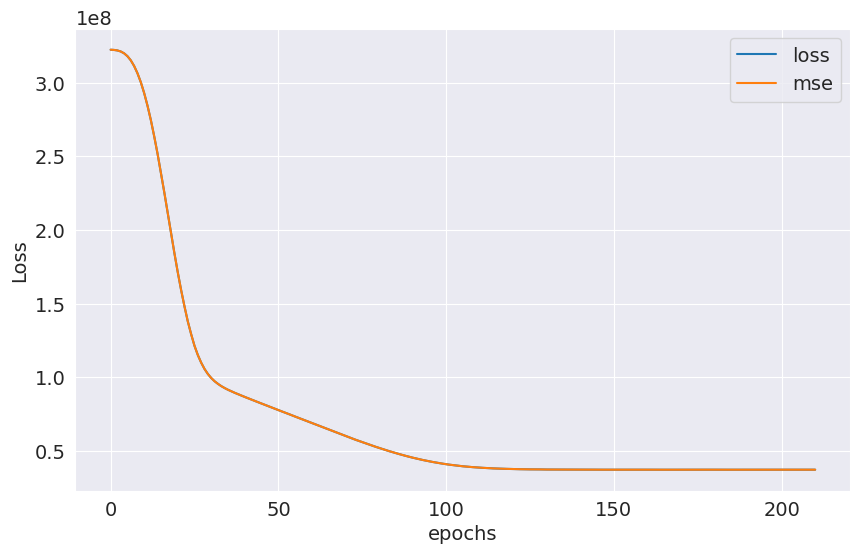

In [58]:
# plot history (also known as training curve OR loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")